<a href="https://colab.research.google.com/github/Xavier26King/ML-Prerequisite-Test/blob/main/2110060_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import time
import numpy as np
from typing import List
import sympy as sp
import pandas as pd
import jax
import jax.numpy as jnp
from dataclasses import dataclass, field, asdict
from typing import Dict, List, Optional
import matplotlib.pyplot as plt

##Q1.
How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.

---

To compute the matrix multiplication of a matrix $A \in \mathbb{R}^{n \times k}$ with a matrix $B \in \mathbb{R}^{k \times m}$, resulting in a matrix $C = AB \in \mathbb{R}^{n \times m}$, each entry $C_{ij}$ is computed as:


$$
C_{ij} = \sum_{l=1}^{k} A_{il} \cdot B_{lj}
$$

#### Number of Operations per Entry

- **Multiplications**: \( k \)  
- **Additions**: \( k - 1 \)


#### Total Number of Entries in Output Matrix

Since $C \in \mathbb{R}^{n \times m}$, there are $n \cdot m$ entries to compute.


#### Total Number of Operations

- **Total Multiplications**:  
  $$
  n \cdot m \cdot k
  $$

- **Total Additions**:  
  $$
  n \cdot m \cdot (k - 1)
  $$

## Q2.
Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?

---

In [16]:
# Matrix Dimensions
n, k, m = 100, 200, 150

# Method1: Using list of lists
# Random matrices A(n x k) and B(k x m)
A = [[np.random.rand() for _ in range(k)] for _ in range(n)]
B = [[np.random.rand() for _ in range(m)] for _ in range(k)]

def matrix_multiply_list(A, B):
    n, k = len(A), len(A[0])
    k1, m = len(B), len(B[0])
    assert k == k1

    results = [[0 for _ in range(m)] for _ in range(n)]
    for i in range(n):
      for j in range(m):
        for l in range(k):
          results[i][j] += A[i][l]*B[l][j]

    return results

# C_list = matrix_multiply_list(A, B)
# print(C_list)

start_time = time.time()
C_list = matrix_multiply_list(A, B)
list_time = time.time() - start_time
print(f"Time taken for Method 1: {list_time} seconds")

# Method 2: Using numpy

A_np = np.array(A)
B_np = np.array(B)

start_time = time.time()
C_np = np.dot(A_np, B_np)
np_time = time.time() - start_time
print(f"Time taken for Method 2: {np_time} seconds")

print(f"Numpy is faster because it avoids for loop by operating whole array at once")

Time taken for Method 1: 0.40406036376953125 seconds
Time taken for Method 2: 0.0009295940399169922 seconds
Numpy is faster because it avoids for loop by operating whole array at once


##Q3.
Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?

---

To find the median, we need the middle element when sorted. For an array of size n, we need to find the (n/2)th largest element. Using this multiple passes method, we need n/2 passes through array and each pass takes O(n) time. So, the time complexity will be O(n^2). One another better approach is sort the entire array and find the middle element. It will take O(n logn).

In [5]:
def median_by_repeated_passes(arr):
  n = len(arr)

  def find_kth_largest(k):
    prev_max = float('inf')
    remaining = k
    while True:
      curr_max = float('-inf')
      for val in arr:
        if val<prev_max and val>curr_max:
          curr_max = val
      cnt = 0
      for val in arr:
        if val==curr_max:
          cnt+=1
      if cnt>=remaining:
        return curr_max # If kth largest lies within the block of curr_max duplicates, then return the answer
      remaining-=cnt # Otherwise, skip
      prev_max = curr_max
    return prev_max

  if n%2==1:
    return find_kth_largest(n//2+1)
  else:
    return (find_kth_largest(n//2+1)+find_kth_largest(n//2))/2


def median_sort(arr):
  sorted_arr = sorted(arr)
  n = len(arr)
  mid = n//2
  if n%2==1:
    return sorted_arr[mid]
  else:
    return (sorted_arr[mid]+sorted_arr[mid-1])/2

def median_numpy(arr):
  return np.median(arr)


n=10001
arr1 = [np.random.randint(1,10000) for _ in range(n)]

start_time = time.time()
print(median_by_repeated_passes(arr1))
print(f"median_k_passes: {time.time()-start_time}")

start_time = time.time()
print(median_sort(arr1))
print(f"median_sort: {time.time()-start_time}")

start_time = time.time()
print(median_numpy(arr1))
print(f"numpy: {time.time()-start_time}")

5059
median_k_passes: 1.9553465843200684
5059
median_sort: 0.0025849342346191406
5059.0
numpy: 0.0014760494232177734


## Q4.
What is the gradient of the following function with respect to x and y?

$ x^2 y + y^3 \sin(x)$

---


Let  
f(x, y) = $ x^2 y + y^3 \sin(x)$

Then the gradient of \( f \) is:

=
\begin{bmatrix}
2xy + y^3 \cos(x) \\
x^2 + 3y^2 \sin(x)
\end{bmatrix}



## Q.5
Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y.

---

In [6]:
import jax
import jax.numpy as jnp

# Define the function
def f(x, y):
    return x**2 * y + y**3 * jnp.sin(x)

# Analytical gradient
def grad_analytic(x, y):
    dfdx = 2 * x * y + y**3 * jnp.cos(x)
    dfdy = x**2 + 3 * y**2 * jnp.sin(x)
    return dfdx, dfdy

# JAX gradient
f_wrapped = lambda vars: f(vars[0], vars[1])
grad_jax = jax.grad(f_wrapped)

# Test for a few random points
points = [(1.0, 2.0), (-1.5, 0.5), (2.2, -1.1)]
for x_val, y_val in points:
    analytic = grad_analytic(x_val, y_val)
    jax_grad = grad_jax(jnp.array([x_val, y_val]))
    print(f"x={x_val}, y={y_val}")
    print("Analytic:", analytic)
    print("JAX     :", tuple(jax_grad))
    print()


x=1.0, y=2.0
Analytic: (Array(8.322418, dtype=float32, weak_type=True), Array(11.0976515, dtype=float32, weak_type=True))
JAX     : (Array(8.322418, dtype=float32), Array(11.0976515, dtype=float32))

x=-1.5, y=0.5
Analytic: (Array(-1.4911579, dtype=float32, weak_type=True), Array(1.5018787, dtype=float32, weak_type=True))
JAX     : (Array(-1.4911579, dtype=float32), Array(1.5018787, dtype=float32))

x=2.2, y=-1.1
Analytic: (Array(-4.056705, dtype=float32, weak_type=True), Array(7.7748423, dtype=float32, weak_type=True))
JAX     : (Array(-4.056705, dtype=float32), Array(7.7748423, dtype=float32))



## Q6.
Use sympy to confirm that you obtain the same gradient analytically.

---

In [7]:

# Symbols
x, y = sp.symbols('x y', real=True)

# Function
f = x**2 * y + y**3 * sp.sin(x)

# SymPy gradient (analytical)
df_dx_sym = sp.diff(f, x)
df_dy_sym = sp.diff(f, y)

# Your derived formulas
df_dx_expected = 2*x*y + y**3 * sp.cos(x)
df_dy_expected = x**2 + 3*y**2 * sp.sin(x)

# Confirm symbolic equality (should simplify to 0)
check_dx = sp.simplify(df_dx_sym - df_dx_expected)
check_dy = sp.simplify(df_dy_sym - df_dy_expected)

print("∂f/∂x (sympy):", df_dx_sym)
print("∂f/∂x (expected):", df_dx_expected)

print("\n∂f/∂y (sympy):", df_dy_sym)
print("∂f/∂y (expected):", df_dy_expected)


∂f/∂x (sympy): 2*x*y + y**3*cos(x)
∂f/∂x (expected): 2*x*y + y**3*cos(x)

∂f/∂y (sympy): x**2 + 3*y**2*sin(x)
∂f/∂y (expected): x**2 + 3*y**2*sin(x)


## Q7.
Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks.

In [8]:
# Student Records - Nested Dictionary Structure

student_records = {
    2022: {
        "Branch 1": {
            1: {
                "name": "N",
                "marks": {
                    "Maths": 100,
                    "English": 70,
                    "Science": 85,
                    "History": 78
                }
            },
            2: {
                "name": "Alice",
                "marks": {
                    "Maths": 95,
                    "English": 88,
                    "Science": 92,
                    "History": 85
                }
            },
            3: {
                "name": "Bob",
                "marks": {
                    "Maths": 87,
                    "English": 79,
                    "Science": 91,
                    "History": 82
                }
            }
        },
        "Branch 2": {
            1: {
                "name": "Charlie",
                "marks": {
                    "Physics": 89,
                    "Chemistry": 93,
                    "Biology": 87,
                    "English": 76
                }
            },
            2: {
                "name": "Diana",
                "marks": {
                    "Physics": 94,
                    "Chemistry": 88,
                    "Biology": 90,
                    "English": 83
                }
            }
        }
    },
    2023: {
        "Branch 1": {
            1: {
                "name": "Eve",
                "marks": {
                    "Maths": 92,
                    "English": 84,
                    "Science": 89,
                    "History": 81
                }
            },
            2: {
                "name": "Frank",
                "marks": {
                    "Maths": 88,
                    "English": 91,
                    "Science": 85,
                    "History": 87
                }
            }
        },
        "Branch 2": {
            1: {
                "name": "Grace",
                "marks": {
                    "Physics": 91,
                    "Chemistry": 86,
                    "Biology": 94,
                    "English": 79
                }
            }
        }
    },
    2024: {
        "Branch 1": {
            1: {
                "name": "Henry",
                "marks": {
                    "Maths": 96,
                    "English": 82,
                    "Science": 88,
                    "History": 90
                }
            }
        },
        "Branch 2": {
            1: {
                "name": "Ivy",
                "marks": {
                    "Physics": 87,
                    "Chemistry": 92,
                    "Biology": 85,
                    "English": 88
                }
            }
        }
    },
    2025: {
        "Branch 1": {
            # Future students will be added here
        },
        "Branch 2": {
            # Future students will be added here
        }
    }
}

# Utility functions to work with the student records

def add_student(records, year, branch, roll_number, name, marks):
    """Add a new student to the records"""
    if year not in records:
        records[year] = {}
    if branch not in records[year]:
        records[year][branch] = {}

    records[year][branch][roll_number] = {
        "name": name,
        "marks": marks
    }

def get_student(records, year, branch, roll_number):
    """Get a specific student's information"""
    try:
        return records[year][branch][roll_number]
    except KeyError:
        return None

def get_all_students_in_branch(records, year, branch):
    """Get all students in a specific branch and year"""
    try:
        return records[year][branch]
    except KeyError:
        return {}

# Example usage and demonstrations
if __name__ == "__main__":
    print("=== Student Records System ===\n")

    # Display basic structure
    print("1. Basic Structure:")
    print("student_records[year][branch][roll_number] = {'name': '...', 'marks': {...}}")

    # Add a new student
    print("\n3. Adding a new student:")
    add_student(student_records, 2025, "Branch 1", 1, "John", {
        "Maths": 94,
        "English": 87,
        "Science": 91,
        "History": 89
    })
    print(get_student(student_records, 2025, "Branch 1", 1))


    # Get all students in a branch
    print("\n5. All students in 2022, Branch 1:")
    branch_students = get_all_students_in_branch(student_records, 2022, "Branch 1")
    print(branch_students)

    print("Data Structure Hierarchy")
    print("student_records = {")
    print("    year: {")
    print("        branch: {")
    print("            roll_number: {")
    print("                'name': 'student_name',")
    print("                'marks': {")
    print("                    'subject': marks")
    print("                }")
    print("            }")
    print("        }")
    print("    }")
    print("}")

=== Student Records System ===

1. Basic Structure:
student_records[year][branch][roll_number] = {'name': '...', 'marks': {...}}

3. Adding a new student:
{'name': 'John', 'marks': {'Maths': 94, 'English': 87, 'Science': 91, 'History': 89}}

5. All students in 2022, Branch 1:
{1: {'name': 'N', 'marks': {'Maths': 100, 'English': 70, 'Science': 85, 'History': 78}}, 2: {'name': 'Alice', 'marks': {'Maths': 95, 'English': 88, 'Science': 92, 'History': 85}}, 3: {'name': 'Bob', 'marks': {'Maths': 87, 'English': 79, 'Science': 91, 'History': 82}}}
Data Structure Hierarchy
student_records = {
    year: {
        branch: {
            roll_number: {
                'name': 'student_name',
                'marks': {
                    'subject': marks
                }
            }
        }
    }
}


## Q.8
Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.

---

In [9]:

@dataclass
class Student:
    roll: int
    name: str
    marks: Dict[str, int] = field(default_factory=dict)  # e.g. {"Maths": 100, "English": 70}


@dataclass
class Branch:
    name: str
    students: List[Student] = field(default_factory=list)

    def add_student(self, student: Student) -> None:
        self.students.append(student)

    def get_student(self, roll: int) -> Optional[Student]:
        return next((s for s in self.students if s.roll == roll), None)


@dataclass
class Year:
    year: int
    branches: List[Branch] = field(default_factory=list)

    def add_branch(self, branch: Branch) -> None:
        self.branches.append(branch)

    def get_branch(self, name: str) -> Optional[Branch]:
        return next((b for b in self.branches if b.name == name), None)


Database = List[Year]

# Pretty print (optional)
def print_database(db: Database) -> None:
    for i, yr in enumerate(sorted(db, key=lambda y: y.year)):
        print(f"{i+1}. {yr.year}")
        for j, br in enumerate(yr.branches, start=1):
            print(f"   {j}. {br.name}")
            for k, st in enumerate(br.students, start=1):
                print(f"      {k}. Roll Number: {st.roll}, Name: {st.name}, Marks:")
                for subj_i, (subj, score) in enumerate(st.marks.items(), start=1):
                    print(f"         {subj_i}. {subj}: {score}")


db: Database = []

# 2022
y2022 = Year(2022)
b1_2022 = Branch("Branch 1")
b1_2022.add_student(Student(roll=1, name="N", marks={"Maths": 100, "English": 70}))
y2022.add_branch(b1_2022)
y2022.add_branch(Branch("Branch 2"))
db.append(y2022)

# 2023
y2023 = Year(2023, branches=[Branch("Branch 1"), Branch("Branch 2")])
db.append(y2023)

# 2024
y2024 = Year(2024, branches=[Branch("Branch 1"), Branch("Branch 2")])
db.append(y2024)

# 2025
y2025 = Year(2025, branches=[Branch("Branch 1"), Branch("Branch 2")])
db.append(y2025)

# Demo print
print_database(db)

# Access examples:
#   Find "Branch 1" in 2022, then student roll 1:
student = next(y for y in db if y.year == 2022).get_branch("Branch 1").get_student(1)
print(student)
#   Convert a student (or any dataclass) to a dict:
student_dict = asdict(student)
print(student_dict)


1. 2022
   1. Branch 1
      1. Roll Number: 1, Name: N, Marks:
         1. Maths: 100
         2. English: 70
   2. Branch 2
2. 2023
   1. Branch 1
   2. Branch 2
3. 2024
   1. Branch 1
   2. Branch 2
4. 2025
   1. Branch 1
   2. Branch 2
Student(roll=1, name='N', marks={'Maths': 100, 'English': 70})
{'roll': 1, 'name': 'N', 'marks': {'Maths': 100, 'English': 70}}


## Q9.
Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.

---

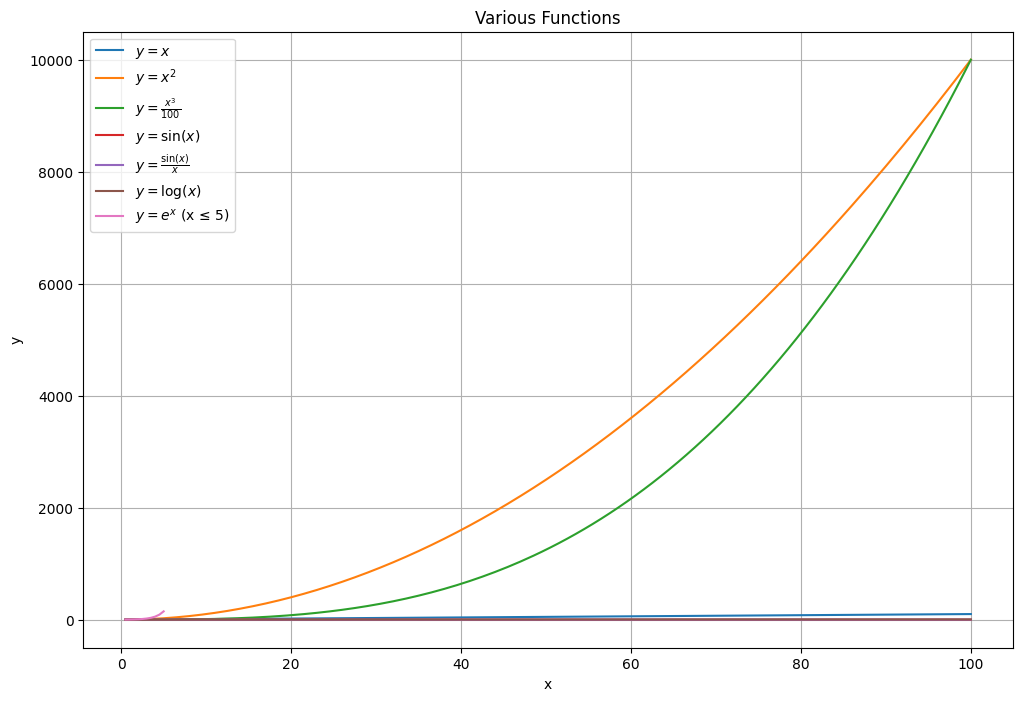

In [10]:

# Domain: x = 0.5 to 100.0 in steps of 0.5
x = np.arange(0.5, 100.0 + 0.5, 0.5)

# Functions
y1 = x
y2 = x**2
y3 = x**3 / 100
y4 = np.sin(x)
y5 = np.sin(x) / x
y6 = np.log(x)
y7 = np.exp(x)

# Plotting
plt.figure(figsize=(12, 8))

plt.plot(x, y1, label=r"$y = x$")
plt.plot(x, y2, label=r"$y = x^2$")
plt.plot(x, y3, label=r"$y = \frac{x^3}{100}$")
plt.plot(x, y4, label=r"$y = \sin(x)$")
plt.plot(x, y5, label=r"$y = \frac{\sin(x)}{x}$")
plt.plot(x, y6, label=r"$y = \log(x)$")

# For y = e^x, values will grow extremely fast — limit x range for visibility
plt.plot(x[x <= 5], np.exp(x[x <= 5]), label=r"$y = e^x$ (x ≤ 5)")

plt.xlabel("x")
plt.ylabel("y")
plt.title("Various Functions")
plt.legend()
plt.grid(True)
plt.show()


## Q.10
Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.

---

In [11]:
# 20x5 matrix with random numbers uniformly from 1 to 2
matrix = np.random.uniform(1, 2, size=(20, 5))

df = pd.DataFrame(matrix, columns=["a", "b", "c", "d", "e"])

# Highest standard deviation
col_with_max_std = df.std().idxmax()

# the lowest mean
row_with_min_mean = df.mean(axis=1).idxmin()

print("DataFrame:\n", df)
print("\nColumn with highest standard deviation:", col_with_max_std)
print("Row index with lowest mean:", row_with_min_mean)


DataFrame:
            a         b         c         d         e
0   1.280548  1.565322  1.118579  1.749867  1.718710
1   1.269046  1.675769  1.561019  1.728168  1.290901
2   1.322295  1.729671  1.192294  1.072000  1.878950
3   1.986980  1.750588  1.138563  1.741082  1.752123
4   1.839784  1.581720  1.112238  1.409660  1.276158
5   1.284006  1.208550  1.836440  1.488247  1.226054
6   1.717393  1.844939  1.633748  1.088486  1.617752
7   1.602286  1.414817  1.450065  1.094410  1.083160
8   1.185486  1.366580  1.024973  1.448071  1.914627
9   1.441161  1.385057  1.182832  1.952979  1.341042
10  1.378167  1.598851  1.693075  1.957990  1.309186
11  1.363584  1.931532  1.620302  1.213169  1.009206
12  1.922513  1.576219  1.783291  1.513302  1.716672
13  1.459087  1.988760  1.669211  1.513065  1.784982
14  1.982832  1.420541  1.859896  1.566427  1.312217
15  1.088788  1.761905  1.908562  1.564780  1.720173
16  1.404219  1.027386  1.353512  1.114573  1.520648
17  1.494937  1.742975  1.773413  

## Q.11
Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.

---

In [12]:

# f = a+b+c+d+e
df["f"] = df[["a", "b", "c", "d", "e"]].sum(axis=1)

# g = LT8 if f<8 else GT8
df["g"] = np.where(df["f"] < 8, "LT8", "GT8")

num_lt8 = (df["g"] == "LT8").sum()

# Std dev of f within each group
std_by_g = df.groupby("g")["f"].std()   # sample std (ddof=1)
std_lt8 = std_by_g.get("LT8", float("nan"))
std_gt8 = std_by_g.get("GT8", float("nan"))

print("Rows with g == 'LT8':", num_lt8)
print("Std(f) for LT8:", std_lt8)
print("Std(f) for GT8:", std_gt8)


Rows with g == 'LT8': 15
Std(f) for LT8: 0.5030921288984193
Std(f) for GT8: 0.1958056349260745


## Q.12
Write a small piece of code to explain broadcasting in numpy.

In [13]:

# Example arrays
A = np.array([[1, 2, 3],
              [4, 5, 6]])   # Shape: (2, 3)

b = np.array([10, 20, 30])  # Shape: (3,)

C = A + b

print("A:\n", A)
print("b:\n", b)
print("A + b:\n", C)
print("Shapes:", A.shape, b.shape, C.shape)


A:
 [[1 2 3]
 [4 5 6]]
b:
 [10 20 30]
A + b:
 [[11 22 33]
 [14 25 36]]
Shapes: (2, 3) (3,) (2, 3)


## Q.13
Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.

In [15]:
def my_argmin(arr: np.ndarray) -> int:
    min_index = 0
    min_value = arr[0]

    for i in range(1, len(arr)):
        if arr[i] < min_value:
            min_value = arr[i]
            min_index = i
    return min_index


# Example usage
arr = np.array([5, 3, 7, 1, 9, -2, 4])

print("Array:", arr)
print("My argmin index:", my_argmin(arr))
print("np.argmin index:", np.argmin(arr))


Array: [ 5  3  7  1  9 -2  4]
My argmin index: 5
np.argmin index: 5
